## 安装必要的库

In [ ]:
!pip install geopandas

## 读取CSV文件

### 纽约犯罪数据

In [ ]:
selected_columns = ['ARREST_KEY', 'ARREST_DATE','Latitude','Longitude']
csv_name = "NewYork_crime_2024.csv"

In [ ]:
!python data_parser.py --input_file NewYork_crime_2024.csv --output_file res.json --selected_columns ARREST_KEY ARREST_DATE Latitude Longitude --geometry_file NewYork.shp --geometry_columns objectid --group_by_day

/content/data_parser.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.dropna(inplace=True)
/content/data_parser.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.dropna(inplace=True)
/content/data_parser.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s[Time_name] = pd.to_datetime(df_s[Time_name], errors='coerce')

^C


### 纽约旅馆数据

In [ ]:
selected_columns = ['PARID','TAXYEAR','Latitude','Longitude']
csv_name = "Hotel.csv"

In [ ]:
!python data_parser.py --input_file Hotel.csv --output_file res.json --selected_columns PARID TAXYEAR Latitude Longitude --geometry_file NewYork.shp --geometry_columns objectid

### 芝加哥犯罪数据

In [ ]:
selected_columns = ['ID', 'Date','Latitude','Longitude']
csv_name = "Chicago_Crimes_-_2024_0711.csv"
print(selected_columns[0])

ID


### 芝加哥民宿数据

In [ ]:
selected_columns = ['id', 'price','latitude','longitude']
csv_name = "Chicago_airbub.csv"
start_date = '2024-01-01'
end_date = '2024-12-31'

In [ ]:
!python data_parser.py --id2id --input_file Chicago_listings.csv --output_file res.json --selected_columns id last_review latitude longitude --geometry_file Chicago.shp --geometry_columns area_numbe

/content/data_parser.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.dropna(inplace=True)
/content/data_parser.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.dropna(inplace=True)
/content/data_parser.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s[Time_name] = pd.to_datetime(df_s[Time_name], errors='coerce')
                       id last_review   l

## 参数读取设计

### 读取对应数据

In [ ]:
import requests
import pandas as pd

# 将CSV数据转换为Pandas DataFrame
data = pd.read_csv(csv_name, on_bad_lines='skip')
df = pd.DataFrame(data)
# 筛选
df_s = df[selected_columns]
df_s.dropna(inplace=True)
df_s['Latitude'] = pd.to_numeric(df_s['Latitude'], errors='coerce')
df_s['Longitude'] = pd.to_numeric(df_s['Longitude'], errors='coerce')
df_s.dropna(inplace=True)
# 重置索引
df_s.reset_index(drop=True, inplace=True)

print(df_s)

       ARREST_KEY ARREST_DATE   Latitude  Longitude
0       280255493  01/10/2024  40.814845 -73.956312
1       279805419  01/02/2024  40.674496 -73.930571
2       279895750  01/03/2024  40.662526 -73.846499
3       280809090  01/19/2024  40.855793 -73.843908
4       280357135  01/11/2024  40.694456 -73.934343
...           ...         ...        ...        ...
63616   282877412  02/27/2024  40.576100 -73.989545
63617   283628088  03/12/2024  40.740151 -73.994805
63618   283387006  03/07/2024  40.671104 -73.913562
63619   283013910  03/01/2024  40.698894 -73.917522
63620   283495531  03/10/2024  40.531707 -74.192126

[63621 rows x 4 columns]


<ipython-input-44-b172cb83cb5e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s.dropna(inplace=True)
<ipython-input-44-b172cb83cb5e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Latitude'] = pd.to_numeric(df_s['Latitude'], errors='coerce')
<ipython-input-44-b172cb83cb5e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [ ]:
df_s['Latitude'] = df_s['latitude']
df_s['Longitude'] = df_s['longitude']
print(df_s)

                       id  price   latitude  longitude   Latitude  Longitude
0                    2384   86.0  41.787900 -87.587800  41.787900 -87.587800
1                    7126   90.0  41.901660 -87.680210  41.901660 -87.680210
2                   10945  114.0  41.911960 -87.639810  41.911960 -87.639810
3                   12140  329.0  41.923570 -87.649470  41.923570 -87.649470
4                   24833   57.0  41.925961 -87.656364  41.925961 -87.656364
...                   ...    ...        ...        ...        ...        ...
7517  1116851419125146887   56.0  41.795290 -87.581940  41.795290 -87.581940
7518  1117394712148132475  123.0  41.914243 -87.706237  41.914243 -87.706237
7519  1117438873812832956  122.0  41.892341 -87.622273  41.892341 -87.622273
7520  1117439997700638787  132.0  41.894067 -87.621591  41.894067 -87.621591
7521  1117896281364781567  106.0  41.958120 -87.753190  41.958120 -87.753190

[7522 rows x 6 columns]


<ipython-input-46-3fd0cb9c236b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Latitude'] = df_s['latitude']
<ipython-input-46-3fd0cb9c236b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['Longitude'] = df_s['longitude']


### 转换datetime格式

In [ ]:
# 尝试将ARREST_DATE列转换为datetime格式，使用errors='coerce'参数将错误数据转换为NaT
df_s['ARREST_DATE'] = pd.to_datetime(df_s['ARREST_DATE'], errors='coerce')
# df_s = df_s.dropna(subset=['TAXYEAR'])
df_s['date'] = df_s['ARREST_DATE'].dt.date
grouped = df_s.groupby('date')
daily_polygon_count = {}
for date, group in grouped:
  daily_polygon_count[str(date)] = 1
print(daily_polygon_count)

{'2024-01-01': 1, '2024-01-02': 1, '2024-01-03': 1, '2024-01-04': 1, '2024-01-05': 1, '2024-01-06': 1, '2024-01-07': 1, '2024-01-08': 1, '2024-01-09': 1, '2024-01-10': 1, '2024-01-11': 1, '2024-01-12': 1, '2024-01-13': 1, '2024-01-14': 1, '2024-01-15': 1, '2024-01-16': 1, '2024-01-17': 1, '2024-01-18': 1, '2024-01-19': 1, '2024-01-20': 1, '2024-01-21': 1, '2024-01-22': 1, '2024-01-23': 1, '2024-01-24': 1, '2024-01-25': 1, '2024-01-26': 1, '2024-01-27': 1, '2024-01-28': 1, '2024-01-29': 1, '2024-01-30': 1, '2024-01-31': 1, '2024-02-01': 1, '2024-02-02': 1, '2024-02-03': 1, '2024-02-04': 1, '2024-02-05': 1, '2024-02-06': 1, '2024-02-07': 1, '2024-02-08': 1, '2024-02-09': 1, '2024-02-10': 1, '2024-02-11': 1, '2024-02-12': 1, '2024-02-13': 1, '2024-02-14': 1, '2024-02-15': 1, '2024-02-16': 1, '2024-02-17': 1, '2024-02-18': 1, '2024-02-19': 1, '2024-02-20': 1, '2024-02-21': 1, '2024-02-22': 1, '2024-02-23': 1, '2024-02-24': 1, '2024-02-25': 1, '2024-02-26': 1, '2024-02-27': 1, '2024-02-28':

<ipython-input-35-b082a9d9a07f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['ARREST_DATE'] = pd.to_datetime(df_s['ARREST_DATE'], errors='coerce')
<ipython-input-35-b082a9d9a07f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s['date'] = df_s['ARREST_DATE'].dt.date


## 读取Taxi Zone数据

In [ ]:
zone_name = "Chicago.shp"

Index(['area', 'area_num_1', 'area_numbe', 'comarea', 'comarea_id',
       'community', 'perimeter', 'shape_area', 'shape_len', 'geometry'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   area        77 non-null     float64 
 1   area_num_1  77 non-null     object  
 2   area_numbe  77 non-null     object  
 3   comarea     77 non-null     float64 
 4   comarea_id  77 non-null     float64 
 5   community   77 non-null     object  
 6   perimeter   77 non-null     float64 
 7   shape_area  77 non-null     float64 
 8   shape_len   77 non-null     float64 
 9   geometry    77 non-null     geometry
dtypes: float64(6), geometry(1), object(3)
memory usage: 6.1+ KB
None


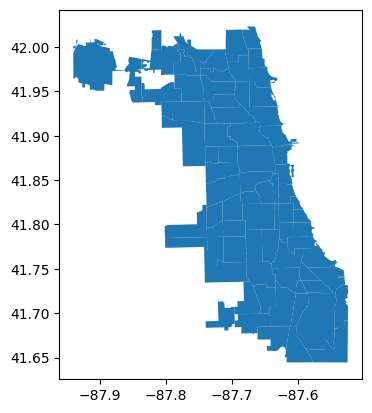

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
# 读取Shapefile
gdf = gpd.read_file(zone_name)
# gdf['objectid'] = gdf['objectid'].astype(int)
# 显示所有列名
print(gdf.columns)
# 显示数据的总体信息
print(gdf.info())
# print(gdf.area_numbe.to_string())
# borough_name = 'Manhattan'
# gdf= gdf[gdf['borough'] == borough_name]
gdf.plot()
plt.show()

## 筛选时间

In [ ]:
start_date = '2024-01-01'
end_date = '2024-12-31'
filter_year = 2024

In [ ]:
filtered_df = df_s[(df_s['Date'] >= start_date) & (df_s['Date'] <= end_date)]
print(filtered_df)

Empty DataFrame
Columns: [ID, Date, Latitude, Longitude]
Index: []


In [ ]:
filtered_df = df_s

In [ ]:
filtered_df = df_s[(df_s['TAXYEAR'] == filter_year)]
print(filtered_df)

            PARID  TAXYEAR   Latitude  Longitude
8294   1000020002     2024  40.701429 -74.011552
8295   1000080039     2024  40.703235 -74.012421
8296   1000080051     2024  40.702744 -74.012201
8297   1000100033     2024  40.704025 -74.012638
8298   1000110029     2024  40.704039 -74.012317
...           ...      ...        ...        ...
11118  5032240019     2024  40.597368 -74.084913
11119  5066680094     2024  40.515283 -74.194552
11120  5070670090     2024  40.553824 -74.216904
11121  5073650001     2024  40.533481 -74.224756
11122  5075840099     2024  40.525055 -74.237788

[2829 rows x 4 columns]


## 将每个点对应到具体的Zone

### 统计数量

In [ ]:
Id_name_One = "area_numbe"
Id_name_Two = "region_id"

Id_name = Id_name_Two

In [ ]:
from shapely.geometry import Point
import json
polygon_count = {idx: 0 for idx in gdf[Id_name]}
geometries = gdf[[Id_name, 'geometry',]]

for idx, row in filtered_df.iterrows():
    target_point = Point(row['Longitude'], row['Latitude'])

    contained_polygons = gdf[gdf.contains(target_point)]
    if not contained_polygons.empty:
        for poly_id in contained_polygons[Id_name]:
          polygon_count[poly_id] += 1


output_json = json.dumps(polygon_count, ensure_ascii=False, indent=4)
print(output_json)

{
    "0": 48,
    "1": 3,
    "2": 3,
    "3": 0,
    "4": 0,
    "5": 0,
    "6": 9,
    "7": 165,
    "8": 9,
    "9": 0,
    "10": 0,
    "11": 1,
    "12": 14,
    "13": 0,
    "14": 1,
    "15": 0,
    "16": 7,
    "17": 0,
    "18": 0,
    "19": 4,
    "20": 0,
    "21": 0,
    "22": 9,
    "23": 2,
    "24": 3,
    "25": 0,
    "26": 2,
    "27": 1,
    "28": 4,
    "29": 0,
    "30": 0,
    "31": 0,
    "32": 108,
    "33": 8,
    "34": 160,
    "35": 28,
    "36": 0,
    "37": 0,
    "38": 1,
    "39": 2,
    "40": 0,
    "41": 0,
    "42": 0,
    "43": 0,
    "44": 7,
    "45": 0,
    "46": 0,
    "47": 8,
    "48": 4,
    "49": 12,
    "50": 0,
    "51": 23,
    "52": 2,
    "53": 0,
    "54": 0,
    "55": 0,
    "56": 2,
    "57": 2,
    "58": 7,
    "59": 10,
    "60": 0,
    "61": 0,
    "62": 32,
    "63": 38,
    "64": 1,
    "65": 6,
    "66": 0,
    "67": 6,
    "68": 8,
    "69": 0,
    "70": 5,
    "71": 1,
    "72": 3,
    "73": 0,
    "74": 3,
    "75": 23,
    "

### 统计价格

In [ ]:
from shapely.geometry import Point
import json
polygon_count = {idx: 0 for idx in gdf['area_numbe']}
geometries = gdf[['area_numbe', 'geometry',]]

for idx, row in filtered_df.iterrows():
    target_point = Point(row['Longitude'], row['Latitude'])
    contained_polygons = gdf[gdf.contains(target_point)]
    if not contained_polygons.empty:
        for poly_id in contained_polygons['area_numbe']:
          polygon_count[poly_id] += row['price']


output_price_json = json.dumps(polygon_count, ensure_ascii=False, indent=4)
print(output_price_json)

### 平均价格

In [ ]:
pricesum_file = "Chicago_homestay_pricesum.json"
count_file = "Chicago_homestay.json"
output_file = "Chicago_homestary_aver.json"

In [ ]:
import json

# 读取价格JSON文件
with open(pricesum_file) as f:
    prices = json.load(f)

# 读取数量JSON文件
with open(count_file) as f:
    quantities = json.load(f)

# 初始化结果字典
result = {}

# 遍历价格字典，并计算价格除以数量
for item in prices:
    if item in quantities:
        # 确保数量不为0，避免除零错误
        if quantities[item] != 0:
            result[item] = prices[item] / quantities[item]
        else:
            result[item] = None  # 或者根据需求处理除零情况

# 打印结果字典，检查计算结果
print(result)

# 将结果保存到新的JSON文件
with open(output_file, 'w') as json_file:
    json.dump(result, json_file, indent=4)


{'35': 163.3921568627451, '36': 218.85714285714286, '37': 104.0, '38': 146.98319327731093, '39': 122.06666666666666, '4': 113.93203883495146, '40': 127.22, '41': 122.06862745098039, '42': 105.3265306122449, '1': 123.87581699346406, '11': 114.10204081632654, '12': 118.125, '13': 123.15789473684211, '14': 118.58461538461539, '15': 117.98913043478261, '16': 118.48717948717949, '17': 373.1219512195122, '18': 96.71428571428571, '19': 144.64102564102564, '2': 115.07142857142857, '20': 146.24, '21': 126.41610738255034, '22': 159.78042959427208, '23': 137.8041237113402, '24': 231.9010989010989, '25': 160.53225806451613, '26': 104.44, '27': 91.42201834862385, '28': 161.4573055028463, '29': 106.20930232558139, '3': 135.39583333333334, '30': 99.17777777777778, '31': 122.16923076923077, '33': 194.882096069869, '34': 129.3896103896104, '10': 114.31372549019608, '8': 201.98341836734693, '32': 196.8617886178862, '43': 112.60526315789474, '44': 166.2, '45': 197.0, '46': 92.23333333333333, '47': 196.0,

In [ ]:
gdf['shape_area_kqm'] = gdf['shape_area'] * 10**4
polygon_density = {idx: count / (gdf.loc[gdf['objectid'] == idx, 'shape_area_kqm'].values[0] ) for idx, count in polygon_count.items()}

# 转换为JSON格式
output_dense_json = json.dumps(polygon_density, ensure_ascii=False, indent=4)


## 输出为json

In [ ]:
with open('mh_hotel.json', 'w', encoding='utf-8') as f:
    f.write(output_json)

## 读取npy文件

In [ ]:
import numpy as np

# 读取.npy文件
data = np.load('mob_label.npy')

# 显示数据
print("读取的数据:")
print(data)

# 检查数据类型和形状
print(f"数据类型: {data.dtype}")
print(f"数据形状: {data.shape}")

读取的数据:
[[7.400e+02 3.600e+01 5.440e+02 ... 1.780e+02 7.500e+01 4.990e+02]
 [6.000e+00 3.220e+02 7.000e+00 ... 7.000e+00 1.000e+00 2.400e+01]
 [4.320e+02 4.300e+01 1.656e+03 ... 4.620e+02 5.930e+02 6.230e+02]
 ...
 [1.260e+02 9.000e+00 3.220e+02 ... 4.360e+02 2.360e+02 1.220e+02]
 [4.700e+01 9.000e+00 3.230e+02 ... 1.150e+02 2.390e+02 7.300e+01]
 [7.230e+02 5.300e+01 7.460e+02 ... 1.550e+02 8.500e+01 6.530e+02]]
数据类型: float64
数据形状: (180, 180)


In [ ]:
import json

# 读取JSON文件
file_path = 'mh_cd.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# 显示数据
print(data)

# 检查数据类型
print(f"数据类型: {type(data)}")

{'0': 2, '1': 8, '2': 5, '3': 10, '4': 7, '5': 12, '6': 6, '7': 6, '8': 3, '9': 0, '10': 4, '11': 9, '12': 2, '13': 8, '14': 7, '15': 7, '16': 10, '17': 4, '18': 5, '19': 5, '20': 11, '21': 12, '22': 0, '23': 11, '24': 9, '25': 9, '26': 6, '27': 10, '28': 4, '29': 10, '30': 8, '31': 7, '32': 12, '33': 6, '34': 2, '35': 0, '36': 10, '37': 9, '38': 12, '39': 10, '40': 7, '41': 12, '42': 4, '43': 7, '44': 5, '45': 6, '46': 6, '47': 2, '48': 3, '49': 4, '50': 8, '51': 3, '52': 11, '53': 11, '54': 8, '55': 10, '56': 9, '57': 12, '58': 8, '59': 0, '60': 7, '61': 7, '62': 2, '63': 2, '64': 12, '65': 2, '66': 10, '67': 4, '68': 6, '69': 7, '70': 4, '71': 0, '72': 5, '73': 7, '74': 6, '75': 0, '76': 6, '77': 6, '78': 0, '79': 5, '80': 7, '81': 6, '82': 1, '83': 8, '84': 11, '85': 3, '86': 12, '87': 7, '88': 12, '89': 9, '90': 3, '91': 2, '92': 0, '93': 5, '94': 7, '95': 0, '96': 10, '97': 0, '98': 4, '99': 3, '100': 5, '101': 10, '102': 8, '103': 7, '104': 8, '105': 4, '106': 7, '107': 12, '108

## 可视化数据

### 柱状图

In [ ]:
file_name = "mh_hotel.json"
axis_name = "hotel"

    region_id  crime_count
113       113          396
122       122          310
174       174          207
95         95          175
7           7          165
..        ...          ...
31         31            0
114       114            0
18         18            0
112       112            0
130       130            0

[180 rows x 2 columns]


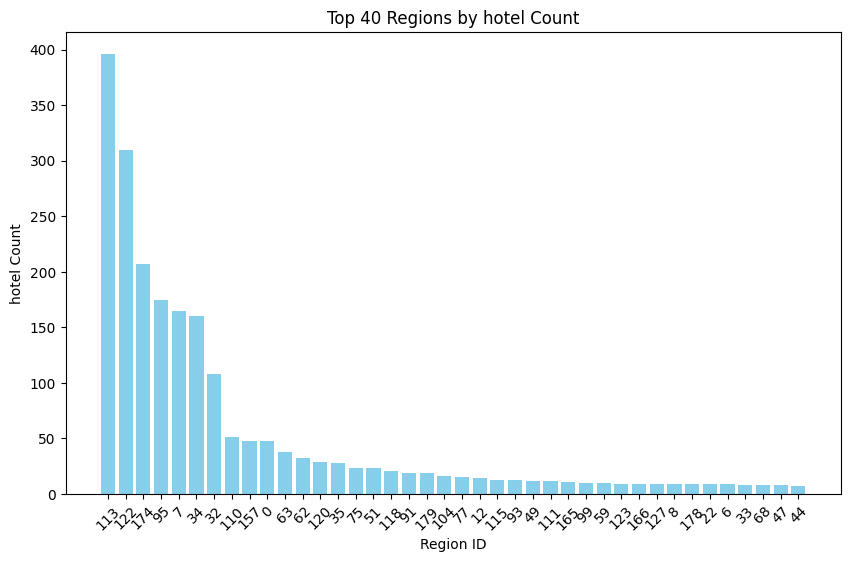

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 读取JSON文件
with open(file_name) as f:
    data = json.load(f)

# 将JSON数据转换为DataFrame
df = pd.DataFrame(list(data.items()), columns=['region_id', 'crime_count'])

# 按照数量进行排序
df_sorted = df.sort_values(by='crime_count', ascending=False)

# 打印排序后的数据框
print(df_sorted)

# 设置图表大小
plt.figure(figsize=(10, 6))

# 只显示数量最高的前20个区域
top_n = 40
df_top_n = df_sorted.head(top_n)

# 绘制条形图
plt.bar(df_top_n['region_id'], df_top_n['crime_count'], color='skyblue')

# 设置图表标题和标签
plt.title('Top 40 Regions by '+axis_name+ ' Count')
plt.xlabel('Region ID')
plt.ylabel(axis_name+' Count')

# 旋转x轴标签以便更好地显示
plt.xticks(rotation=45)

# 显示图表
plt.show()


### 散点图

In [ ]:
file_one = "mh_hotel.json"
file_two = "mh_crime.json"

    region_id  hotel_count  crime_count
0           0           48           30
1           1            3          101
2           2            3           85
3           3            0           28
4           4            0           49
..        ...          ...          ...
175       175            1           23
176       176            0           30
177       177            5           32
178       178            9          116
179       179           19           29

[180 rows x 3 columns]


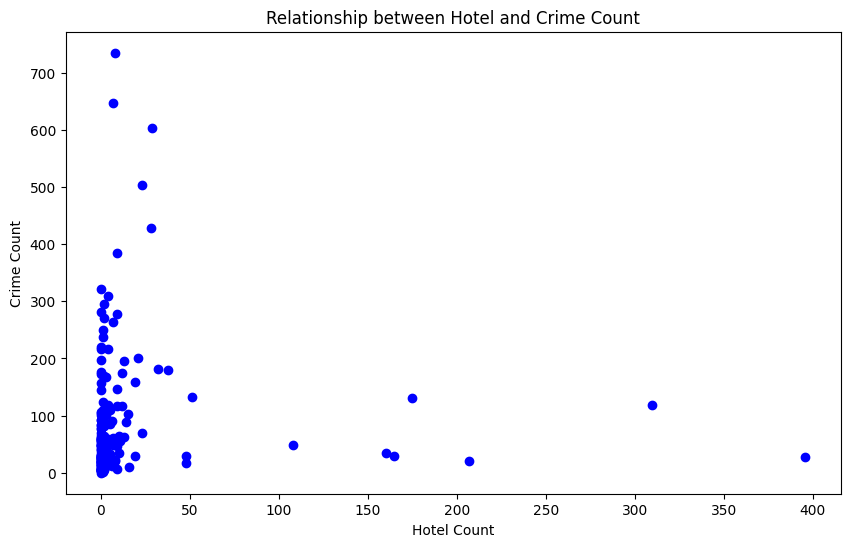

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json

# 读取酒店数量JSON文件
with open(file_one) as f:
    hotel_data = json.load(f)

# 读取犯罪数量JSON文件
with open(file_two) as f:
    taxi_data = json.load(f)

# 将JSON数据转换为DataFrame
hotel_df = pd.DataFrame(list(hotel_data.items()), columns=['region_id', 'hotel_count'])
taxi_df = pd.DataFrame(list(taxi_data.items()), columns=['region_id', 'crime_count'])

# 合并两个DataFrame
merged_df = pd.merge(hotel_df, taxi_df, on='region_id')

# 打印合并后的数据框，检查数据是否正确
print(merged_df)

# 设置图表大小
plt.figure(figsize=(10, 6))

# 绘制散点图
plt.scatter(merged_df['hotel_count'], merged_df['crime_count'], color='blue')

# 设置图表标题和标签
plt.title('Relationship between Hotel and Crime Count')
plt.xlabel('Hotel Count')
plt.ylabel('Crime Count')

# 显示图表
plt.show()


## 出租车旅程数据

In [ ]:
import pandas as pd
import requests
import json
import io

# 基础URL
base_url = "https://data.cityofnewyork.us/resource/qp3b-zxtp.csv"
limit = 10000

# 初始化字典，用于存储LocationID的计数
location_counts = {}

# 从offset=0开始，获取100批数据
for offset in range(0, 500):
    url = f"{base_url}?$limit={limit}&$offset={offset * limit}"
    response = requests.get(url)

    # 如果请求成功，将数据处理
    if response.status_code == 200:
        data = response.content.decode('utf-8')
        df = pd.read_csv(io.StringIO(data))
        # 更新字典中的LocationID计数
        if 'pulocationid' in df.columns and 'dolocationid' in df.columns:

            # for location_id in df['pulocationid']:
            #     if location_id in location_counts:
            #         location_counts[location_id] += 1
            #     else:
            #         location_counts[location_id] = 1

            for location_id in df['dolocationid']:
                if location_id in location_counts:
                    location_counts[location_id] += 1
                else:
                    location_counts[location_id] = 1
    else:
        print(f"Failed to retrieve data for offset {offset * limit}")

# 打印字典以检查结果
print(location_counts)

# 将结果保存到本地JSON文件
with open('Taxi_2022_yellow.json', 'w') as json_file:
    json.dump(location_counts, json_file)


{236: 244813, 42: 23760, 166: 40066, 68: 118793, 163: 113322, 161: 161563, 87: 30436, 152: 9016, 141: 153246, 229: 114886, 90: 73423, 113: 62939, 79: 111808, 140: 115247, 151: 53523, 107: 106686, 7: 16819, 263: 119498, 43: 63587, 24: 20586, 233: 76164, 238: 130796, 48: 138928, 237: 215955, 249: 88097, 186: 103922, 92: 2350, 262: 86059, 170: 150534, 74: 40218, 10: 3580, 112: 9914, 4: 21914, 45: 11822, 148: 47318, 47: 572, 142: 142752, 137: 76454, 261: 17996, 246: 80474, 41: 36434, 36: 3132, 239: 150488, 168: 3418, 243: 9618, 61: 7127, 153: 239, 231: 70489, 139: 803, 265: 14069, 114: 48649, 97: 6078, 255: 11002, 211: 40871, 164: 91221, 180: 490, 144: 41505, 256: 10650, 13: 31004, 134: 1484, 143: 85598, 196: 1696, 125: 21101, 50: 57426, 162: 120597, 234: 115893, 65: 5838, 181: 11131, 83: 1235, 40: 3961, 193: 4854, 130: 2139, 226: 10657, 202: 2475, 56: 1416, 70: 2166, 80: 5965, 17: 6029, 85: 798, 223: 7826, 241: 881, 224: 21569, 179: 5897, 18: 864, 244: 17914, 157: 1570, 189: 3865, 129: 78